<a href="https://colab.research.google.com/github/liampert/python_study/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensors

Tensors are the basic building blocks in Pytorch. Tensors are similar to matrices, but the have extra properties and they can represent higher dimensions. For example, an square image with 256 pixels in both sides can be represented by a 3x256x256 tensor, where the first 3 dimensions represent the color channels, red, green and blue.

In [ ]:
import torch
import numpy as np
import pprint as pp

### How do you initialize a tensor?
- from a list
- from a numpy array
- by specifying its shape
- from another tensor


In [ ]:
### from a list ###
# note that the list can have sublists

data = [
        [0, 1],
        [2, 3],
        [4, 5]
       ]
x_python = torch.tensor(data)

# Print the tensor
x_python

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
### from a numpy array ###

ndarray = np.array(data)

x_numpy = torch.from_numpy(ndarray)

# Print the tensor
x_numpy

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
### by specifying the tensor shape ###
# options include
  # torch.zeros()
  # torch.ones()
  # torch.rand() - random from unit interval
  # torch.randn() - random from normal distribution
  # torch.arange() - returns a 1-D tensor with elements ranging from 0 to end-1

# Initialize a 2x3x2 tensor of zeros
x_zeros = torch.zeros(2,3,2)
print(x_zeros)

# Initialize a 2x2 tensor of random numbers on the unit interval
x_rand = torch.rand(2,2)
x_rand


tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])


tensor([[0.2348, 0.8105],
        [0.9692, 0.9363]])

In [ ]:
### from another tensor ###
# new tensor takes the shape of the old tensor

x_ones = torch.ones_like(x_numpy)
x_ones

x_randn = torch.randn_like(x_zeros)
x_randn

tensor([[[-1.6770, -0.7658],
         [-0.9953, -0.0943],
         [ 1.0008,  0.6535]],

        [[-0.1569,  0.4286],
         [-1.1477,  0.0811],
         [-1.1742, -1.3563]]])

### Tensor shape

In [ ]:
### Print out its shape ###
x_ones.size()
x_ones.shape

torch.Size([3, 2])

In [ ]:
### How to change the shape of a tensor? ###
  # with view() or torch.reshape()

print("\n x_ones \n", x_ones)

# view() to 1x6
# x_view shares the same memory as x, so changing one changes the other
x_view = x_ones.view(1, 6)
print("\n view()\n", x_view)

# torch.reshape() to 6x1
# x_reshaped could be a reference to or copy of x
x_reshaped = torch.reshape(x_ones, (3, 1, 2))
print("\n torch.reshape \n", x_reshaped)


 x_ones 
 tensor([[1, 1],
        [1, 1],
        [1, 1]])

 view()
 tensor([[1, 1, 1, 1, 1, 1]])

 torch.reshape 
 tensor([[[1, 1]],

        [[1, 1]],

        [[1, 1]]])


In [ ]:
### How to add a dimension to the tensor? ###
  # torch.unsqueeze()

x = torch.arange(10).reshape(2,5)

# Add a new dimension of size 1 at the 2nd dimension
x_new = x.unsqueeze(2)
x_new = x_new.unsqueeze(3)

print(x.shape, '\n', x)
print('')
print(x_new.shape, '\n', x_new)

# Note: you can also get rid of all the dimensions with 1 element
  # x = x.squeeze()
  # x.shape

torch.Size([2, 5]) 
 tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

torch.Size([2, 5, 1, 1]) 
 tensor([[[[0]],

         [[1]],

         [[2]],

         [[3]],

         [[4]]],


        [[[5]],

         [[6]],

         [[7]],

         [[8]],

         [[9]]]])


### operations

In [ ]:
### Calculate mean and standard error ###

# Create an example tensor
m = torch.tensor(
    [
     [1., 1.],
     [2., 2.],
     [3., 3.],
     [4., 4.]
    ]
)

pp.pprint("Mean: {}".format(m.mean()))
pp.pprint("Std Deviation: {}".format(m.std()))

pp.pprint("Mean in the 0th dimension: {}".format(m.mean(0)))
pp.pprint("Mean in the 1st dimension: {}".format(m.mean(1)))

'Mean: 2.5'
'Std Deviation: 1.1952285766601562'
'Mean in the 0th dimension: tensor([2.5000, 2.5000])'
'Mean in the 1st dimension: tensor([1., 2., 3., 4.])'


In [ ]:
### Automatic differentiation ###

# Create an example tensor
# Note: requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)
# requires_grad=True means to compute and keep track of all derivatives from
# all objects

# Print the gradient if it is calculated
pp.pprint(x.grad)
  # Currently None bc x is a scalar

# Spz we have a function y=f(x) and we want to calculate the gradient of y wrt x
y = x * x * x * 3 # define y = 3x^3. note that x is the tensor we defined above

y.backward()
pp.pprint(x.grad) # d(y)/d(x) = d(3x^3)/d(x) = 9x^2 = 36

# Spz we have another function, z=f(x)
z = x * x * 3 # 3x^2

z.backward()
pp.pprint(x.grad)

# What happened? Why is this useful for working with neural networks?

None
tensor([36.])
tensor([48.])


### GPU, CPU

Device property tells PyTorch where to store our tensor. Where a tensor is stored determines which device, GPU or CPU, would be handling the computations involving it. We can find the device of a tensor with the device property.

In [ ]:
# Which device is handling the computations for the tensor?
print(x.device)

# How do we move the tensor to another device?
# Check if a GPU is available, then move the tensor to the GPU
if torch.cuda.is_available():
  x.to('cuda')

print(x.device)

cpu
cpu


## Gradient Descent in Pytorch


# Loading data in Pytorch

This just downloads the data to the colab drive. Remember, anything you put on your colab drive gets deleted after you quit -- always back up your data!

In [4]:
"""
 !curl -L -o kaggle-cat-vs-dog-dataset.zip\
 https://www.kaggle.com/api/v1/datasets/download/karakaggle/kaggle-cat-vs-dog-dataset
 ! unzip kaggle-cat-vs-dog-dataset.zip
"""

Streaming output truncated to the last 5000 lines.
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/55.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/550.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5500.jpg  
  inflating: kagglecats

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision import datasets, transforms

Load the data from folders. Uses subfolder names to identify classes. So if an image is in the "Dog" subfolder it gets the Dog class.

In [6]:
full_data = datasets.ImageFolder('kagglecatsanddogs_3367a/PetImages', transform=None)

Let's look inside the data: each element is a *tuple* containing an image conveniently formatted with the Python Image Library (PIL) for us in the first position, and a binary label in the second

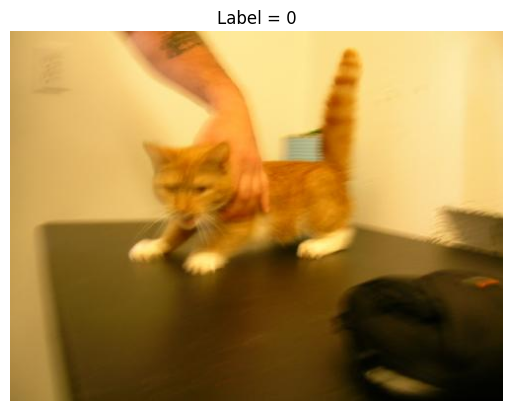

In [7]:
x, y = full_data[0]

# Code to plot one image using python's matplotlib plotting library
plt.figure()    # Initialize a new figure
plt.imshow(x)   # Plot the image to it
plt.title("Label = " + str(y))  # Add the label to the title
plt.axis('off') # Turn off figure axes
plt.show()      # Actually make the plot

Remember: our computer sees images as arrays with numbers between 0 and 255. When images are in **color** instead of one array there are three, one for red, one for green and one for blue.

In [8]:
print(np.asarray(x))

[[[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [240 201 122]
  [239 200 121]
  [238 199 120]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [240 201 122]
  [239 200 121]
  [239 200 121]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [241 202 123]
  [240 201 122]
  [239 200 121]]

 ...

 [[153 122  55]
  [153 122  55]
  [153 122  55]
  ...
  [  2   2   0]
  [  2   2   0]
  [  2   2   0]]

 [[152 121  54]
  [152 121  54]
  [152 121  54]
  ...
  [  1   1   0]
  [  1   1   0]
  [  1   1   0]]

 [[151 120  53]
  [151 120  53]
  [152 121  54]
  ...
  [  1   1   0]
  [  1   1   0]
  [  1   1   0]]]


In order to proceed as we want we have to *preprocess* the images as follows:

  1. Resize them to be 100x100 pixels each
  2. Turn them to black and white.
  3. Standardize pizels between -1 and 1
  4. Split data into a train set and a validation set

torchvision allows us to do this very easily using its **transforms** parameter

In [9]:
trns = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_data = datasets.ImageFolder('kagglecatsanddogs_3367a/PetImages', transform=trns)

We use the torch function `random_split` to make a train-test split randomly.

In [10]:
# Train set is 80% of the size of the full data
train_size = int(0.8 * len(full_data))
# Val. set is remaining 20%
validation_size = len(full_data) - train_size
trds, vlds = random_split(full_data, [train_size, validation_size])

Finally we need to initialize our datasets as torch `dataloader` objects: these will allow us to split our data into batches, and iterate through it as we train our model.

In [11]:
trld = DataLoader(trds, batch_size=32, shuffle=True)
vlld = DataLoader(vlds, batch_size=32, shuffle=True)

## Neural Networks in pytorch

### The linear layer

Recall from class: we saw that one layer within our model can be defined as:

$$\mathbf{o}_l = \sigma(\mathbf{w}^T\mathbf{o}_{l-1}),$$

where $\mathbf{o}_{l-1}$ is the output of the layer preceeding $l$.

In [ ]:
# Initializes the activation function for all our layers (we use sigmoid)
# Normal python
def sigmoid(x):
  return 1/(1+np.exp(-x))

# Pytorch
s = nn.Sigmoid()


# Initializes a layer with 256 neurons. Weights are set to random numbers.
#Normal Python
w = np.random.randn(100*100, 256)

# Pytorch
h1 = nn.Linear(100*100, 256)


# Vectorize our image
# Normal python
np_x_vec = x.numpy().flatten()

# Pytorch
pt_x_vec = x.flatten()

# Computes the output of the layer by passing the image to it.
# Normal python
o1 = sigmoid(w.T @ np_x_vec)

# Pytorch
o1 = s(h1(pt_x_vec))
o1

tensor([0.4327, 0.5393, 0.4532, 0.5323, 0.3995, 0.5358, 0.5253, 0.4128, 0.5890,
        0.3695, 0.3840, 0.4662, 0.4259, 0.5415, 0.3671, 0.4184, 0.6073, 0.4683,
        0.4590, 0.4898, 0.5205, 0.5317, 0.5704, 0.6054, 0.4916, 0.4592, 0.6352,
        0.4550, 0.5818, 0.4654, 0.3160, 0.3870, 0.4349, 0.4813, 0.5432, 0.4924,
        0.4701, 0.3993, 0.5273, 0.4563, 0.4849, 0.4421, 0.5356, 0.5077, 0.5348,
        0.5045, 0.5506, 0.4899, 0.5287, 0.4697, 0.4056, 0.4133, 0.5581, 0.5862,
        0.4038, 0.4741, 0.4690, 0.4359, 0.4158, 0.5301, 0.4993, 0.5186, 0.5104,
        0.4866, 0.4717, 0.4797, 0.5112, 0.5362, 0.4025, 0.4035, 0.4835, 0.4847,
        0.4870, 0.5832, 0.4587, 0.5864, 0.3290, 0.6054, 0.5497, 0.5440, 0.3623,
        0.5905, 0.5773, 0.5236, 0.4069, 0.5734, 0.4854, 0.4560, 0.5364, 0.5538,
        0.6222, 0.4386, 0.4909, 0.5603, 0.3755, 0.5748, 0.5758, 0.6429, 0.3895,
        0.5250, 0.6439, 0.4387, 0.4485, 0.5457, 0.3694, 0.3667, 0.4698, 0.3824,
        0.4189, 0.3797, 0.2800, 0.3679, 

Ok, let's implement a simple 3-layer DNN in pytorch using what we just learned.

In [ ]:
s = nn.Sigmoid()              # init activation
h1 = nn.Linear(100*100, 256)  # init 1st layer
h2 = nn.Linear(256, 128)      # init 2nd layer
h3 = nn.Linear(128, 1)        # init 3rd layer the output size is 1 for this as it needs to return a single predicted probability!

Suppose now we wanted to obtain predictions made by this NN for our data:

In [ ]:
x_vec = x.flatten()           # first vectorize the image
o1 = s(h1(x_vec))             # compute output of 1st hidden layer
o2 = s(h2(o1))                # ...2nd hidden layer
o3 = s(h3(o2))                # ...3rd and final layer
o3

That's it! It is good practice to define and initialize one's model as python classes inheriting from `nn.Module`. This can be done as follows:

In [ ]:
class DNN(nn.Module):
  def __init__(self):
    super(DNN, self).__init__()

    # Initialize your layers here
    self.s = nn.Sigmoid()
    self.h1 = nn.Linear(100*100, 256)
    self.h2 = nn.Linear(256, 128)
    self.h3 = nn.Linear(128, 1)

  def forward(self, x):
    # Use the forward function to define the operations that
    # run the data through your network.
    x_vec = x.flatten()                     # first vectorize the image
    o1 = self.s(self.h1(x_vec))             # compute output of 1st hidden layer
    o2 = self.s(self.h2(o1))                # ...2nd hidden layer
    o3 = self.s(self.h3(o2))                # ...3rd and final layer
    return o3

Now we can initialize our model and use it on some input data easily:

In [ ]:
model = DNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"The model has {count_parameters(model):,} trainable parameters")

tensor([0.4538], grad_fn=<SigmoidBackward0>)

## Training NNs in Pytorch

In [ ]:
epochs=100
optimizer = optim.SGD(model.parameters(), lr=1.0)
criterion = nn.BCELoss()

training_loss = []
training_acc = []
model.train()
pbar = tqdm(range(epochs))
for epoch in pbar:
  epoch_loss = 0
  epoch_acc = 0
  for inputs, labels in iter(trld):
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()

      predictions = model(inputs)
      loss = criterion(predictions, labels)

      loss.backward()
      optimizer.step()

      epoch_acc += (predictions.argmax(1) == labels).sum().item() / labels.shape[0]
      epoch_loss += loss.item()
  training_loss.append(epoch_loss / len(trld))
  training_acc.append(epoch_acc / len(trld))
  pbar.set_postfix({'Training loss': training_loss[-1], 'Training acc': training_acc[-1]})